In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(
    'Dataset/train',  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Dataset/testing',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')


Found 440 images belonging to 5 classes.
Found 185 images belonging to 5 classes.


In [5]:
path = './Dataset/train/' #Don't forget that last bar

In [6]:
import os
class_names = sorted(os.listdir(path))
num_classes = len(class_names)
print (num_classes)
img_size = (192, 192, 3)

print('classes: ', class_names)

5
classes:  ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczemaa', 'Rosacea']


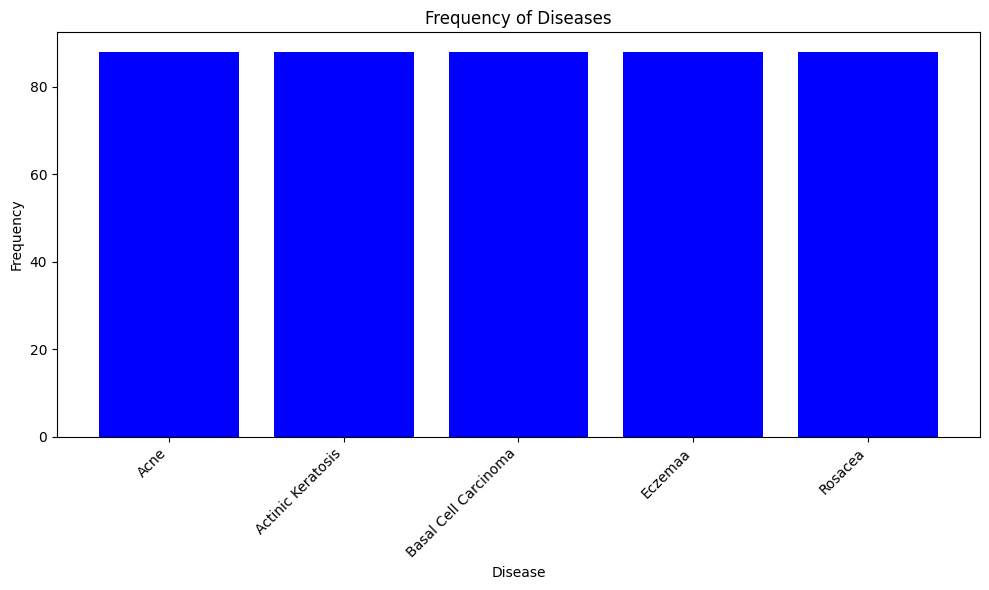

In [7]:
import matplotlib.pyplot as plt

# Chemin vers le répertoire d'entraînement
path = './Dataset/train/'  # N'oubliez pas la barre oblique finale

# Obtenez la liste des noms de classes (dossiers)
class_names = sorted(os.listdir(path))

# Comptez le nombre d'images dans chaque classe
class_counts = []
for class_name in class_names:
    class_path = os.path.join(path, class_name)
    num_images = len(os.listdir(class_path))
    class_counts.append(num_images)

# Tracé de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='blue')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.title('Frequency of Diseases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
import cv2

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2]))

        
        #image = np.asarray(cv2.resize(cv2.imread(data_path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2]))
        images.append(image)
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')


images:

Acne -> done
Actinic Keratosis -> done
Basal Cell Carcinoma -> done
Eczemaa -> done
Rosacea -> done


labels shape: (440, 5)
images shape: (440, 192, 192, 3)


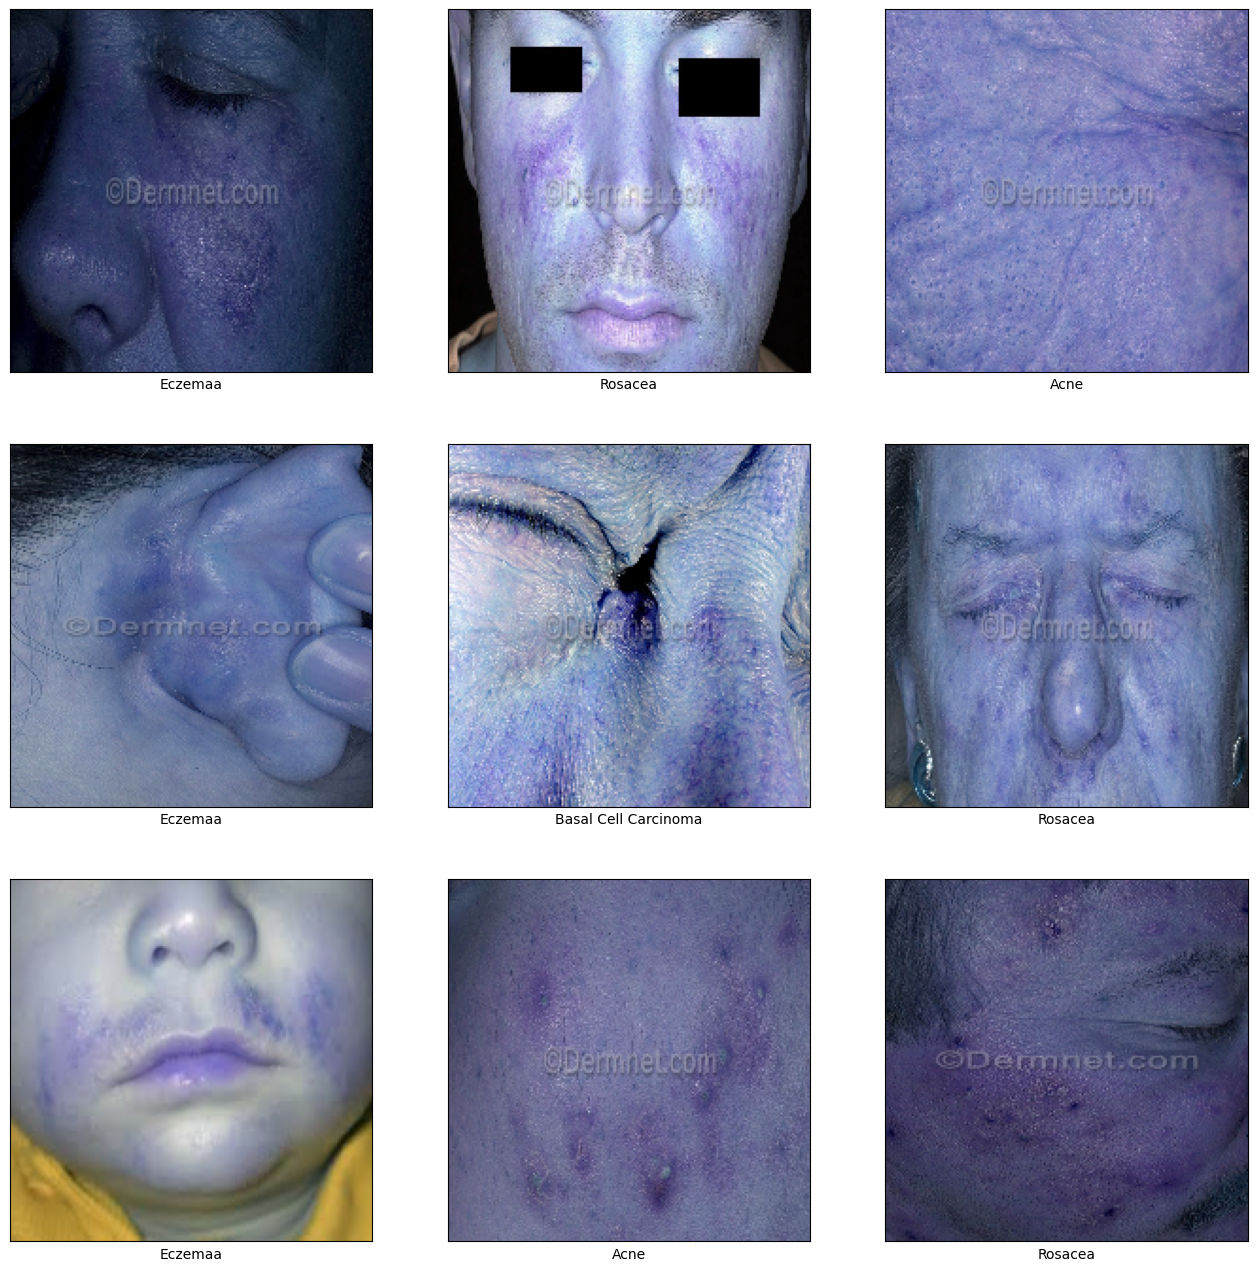

In [9]:
from random import randint

fig, axs = plt.subplots(3, 3, figsize=(16, 16))#Original was 10,6

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
                    
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
        
plt.show()

In [10]:
#r diviser vos données en ensembles d’entraînement et de validation.
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (374, 192, 192, 3)
train labels shape: (374, 5)

validation images shape: (66, 192, 192, 3)
validation labels shape: (66, 5)



In [11]:
from imblearn.over_sampling import RandomOverSampler

# Créer l'objet de suréchantillonnage
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Adapter et rééchantillonner les données d'entraînement seulement
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train.reshape(-1, img_size[0]*img_size[1]*img_size[2]), y_train)

# Rétablir la forme des données
X_train_resampled = X_train_resampled.reshape(-1, img_size[0], img_size[1], img_size[2])

# Vérifier les nouvelles formes
print(f'Nouvelles formes après suréchantillonnage : {X_train_resampled.shape}, {y_train_resampled.shape}')


Nouvelles formes après suréchantillonnage : (385, 192, 192, 3), (385, 5)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créer des générateurs de données avec augmentation pour l'entraînement et sans augmentation pour la validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Dataset/train',  
    target_size=(img_size[0], img_size[1]),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'Dataset/testing',  
    target_size=(img_size[0], img_size[1]),
    batch_size=32,
    class_mode='categorical')

Found 440 images belonging to 5 classes.
Found 185 images belonging to 5 classes.


Found 440 images belonging to 5 classes.
Found 185 images belonging to 5 classes.
Epoch 1/50
14/14 [==============================] - 43s 3s/step - loss: 1.7088 - accuracy: 0.2614 - val_loss: 1.4051 - val_accuracy: 0.4216
Epoch 2/50
14/14 [==============================] - 37s 3s/step - loss: 1.4103 - accuracy: 0.4182 - val_loss: 1.3323 - val_accuracy: 0.4432
Epoch 3/50
14/14 [==============================] - 38s 3s/step - loss: 1.2918 - accuracy: 0.4955 - val_loss: 1.2676 - val_accuracy: 0.4811
Epoch 4/50
14/14 [==============================] - 39s 3s/step - loss: 1.2742 - accuracy: 0.5045 - val_loss: 1.2162 - val_accuracy: 0.5243
Epoch 5/50
14/14 [==============================] - 37s 3s/step - loss: 1.1299 - accuracy: 0.5545 - val_loss: 1.1877 - val_accuracy: 0.5027
Epoch 6/50
14/14 [==============================] - 36s 3s/step - loss: 1.0979 - accuracy: 0.5545 - val_loss: 1.2126 - val_accuracy: 0.5135
Epoch 7/50
14/14 [==============================] - 43s 3s/step - loss: 1.0299

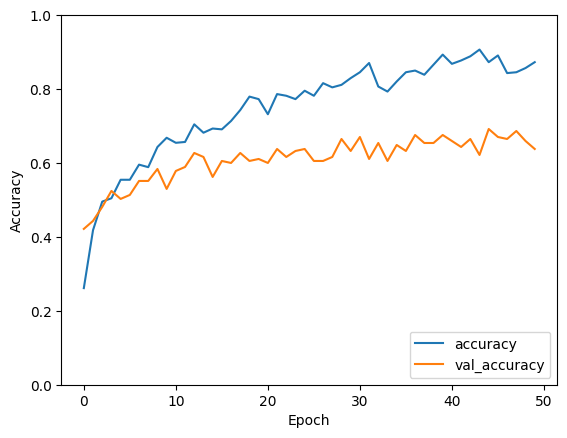

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Charger le modèle VGG16 pré-entraîné sans les couches fully-connected
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Autoriser le fine-tuning des dernières couches convolutionnelles
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Ajouter des couches fully-connected personnalisées au-dessus du modèle VGG16
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

# Créer un modèle composite en spécifiant les entrées et les sorties
model = Model(inputs=base_model.input, outputs=output)

# Compiler le modèle avec un taux d'apprentissage plus faible
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Augmenter les données d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'Dataset/testing',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

# Entraîner le modèle avec plus d'époques
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

# Visualiser les performances d'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model{epoch:02d}')

In [20]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=test_generator)


Epoch 1/50


14/14 [==============================] - 148s 7s/step - loss: 1.6122 - accuracy: 0.1818 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/50
14/14 [==============================] - 61s 4s/step - loss: 1.6102 - accuracy: 0.1977 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/50
14/14 [==============================] - 66s 5s/step - loss: 1.6096 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/50
14/14 [==============================] - 68s 5s/step - loss: 1.6096 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 5/50
14/14 [==============================] - 73s 5s/step - loss: 1.6097 - accuracy: 0.1636 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 6/50
14/14 [==============================] - 70s 5s/step - loss: 1.6096 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 7/50
14/14 [==============================] - 67s 5s/step - loss: 1.6096 - accuracy: 0.1795 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 8/50
14/14 

KeyboardInterrupt: 

In [17]:
#architecture
model_json = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)

In [18]:
#poids
model.save_weights('cnn_model.h5')

In [26]:
from keras.models import model_from_json

json_file = open('./cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

In [33]:
import cv2

# Chemin vers l'image
image_path = 'images/1.jpg'

# Lire l'image

loaded_image = cv2.imread(image_path)


In [34]:
import numpy as np
import cv2

# Convertir l'image téléchargée en tableau numpy
uploaded_image_np = np.array(loaded_image)

# Redimensionner l'image à la taille attendue par le modèle
processed_image = cv2.resize(uploaded_image_np, (192, 192))

# Mettre à l'échelle les valeurs de pixels à l'intervalle [0, 1]
processed_image = processed_image / 255.0


In [35]:


# Effectuer la prédiction avec le modèle
prediction = cnn_model.predict(np.expand_dims(processed_image, axis=0))

# Obtenir la classe prédite
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

print(f"Classe prédite : {predicted_class}")


1/1 [==============================] - 1s 526ms/step
Classe prédite : Eczemaa


In [52]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Charger le modèle CNN préalablement entraîné
cnn_model.load_weights("./cnn_model.h5")
print("Loaded model from disk")
# Charger le classificateur Haar Cascade pour la détection de visage
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Seuil de confiance pour la détection des anomalies
confidence_threshold = 0.5

# Fonction pour prétraiter une image pour la prédiction
def preprocess_image(img):
    img = cv2.resize(img, (192, 192))  # Redimensionner l'image à la taille attendue par le modèle
    img = img / 255.0  # Mettre à l'échelle les valeurs de pixels à l'intervalle [0, 1]
    img = np.expand_dims(img, axis=0)  # Ajouter une dimension pour correspondre à l'entrée du modèle
    return img

# Fonction pour détecter et recadrer le visage dans une image
def detect_and_crop_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) > 0:
        x, y, w, h = faces[0]
        # Recadrer le visage
        face_img = img[y:y+h, x:x+w]
        # Redimensionner le visage à la taille attendue par le modèle CNN
        return cv2.resize(face_img, (192, 192))
    else:
        return None

# Capture vidéo depuis la webcam
cap = cv2.VideoCapture(0)

# Attente initiale pour stabiliser la webcam
for _ in range(30):
    _, _ = cap.read()

# Boucle principale de détection
while True:
    ret, frame = cap.read()  # Lecture d'une image depuis la webcam
    
    if not ret:
        print("Erreur lors de la capture de l'image de la webcam.")
        break
    
    # Détection et recadrage du visage
    face_img = detect_and_crop_face(frame)
    if face_img is not None:
        # Prétraitement de l'image capturée pour la prédiction
        processed_frame = preprocess_image(face_img)
        # Effectuer la prédiction avec le modèle CNN
        prediction = cnn_model.predict(processed_frame)

        # Obtenir la classe prédite
        predicted_class_index = np.argmax(prediction)
        predicted_class = class_names[predicted_class_index]

        # Vérification si la prédiction dépasse le seuil de confiance
        if predicted_class in class_names and np.max(prediction) > confidence_threshold:
            # Si l'anomalie cible est détectée avec une probabilité suffisante
            # Afficher l'anomalie détectée sur le visage
            cv2.putText(frame, f"Anomalie detectee: {predicted_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
        else:
            # Si la prédiction est inférieure au seuil de confiance ou si une autre classe est détectée,
            # ne pas afficher d'anomalie détectée
            cv2.putText(frame, "Detection en cours...", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Afficher le visage avec ou sans anomalie détectée
        cv2.imshow('Detection des anomalies faciales', frame)
    
    # Sortie de la boucle si la touche 'q' est enfoncée
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libération de la capture de la webcam et fermeture des fenêtres OpenCV
cap.release()
cv2.destroyAllWindows()


Loaded model from disk
1/1 [==============================] - 0s 98ms/step


In [58]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'load_weights' is not defined